# Categorical Data

In [1]:
import seaborn as sns
%matplotlib inline

##### Categorical scatterplots:

- `stripplot()` (with kind="strip"; the default)
- `swarmplot()` (with kind="swarm")
##### Categorical distribution plots:

- `boxplot()` (with kind="box")
- `violinplot()` (with kind="violin")
- `boxenplot()` (with kind="boxen")
##### Categorical estimate plots:

- `pointplot()` (with kind="point")
- `barplot()` (with kind="bar")
- `countplot()` (with kind="count")

**hese families represent the data using different levels of granularity.**

## Categorical scatterplots


In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


 The first approach used by `stripplot()`, which is the **default** “kind” in catplot()

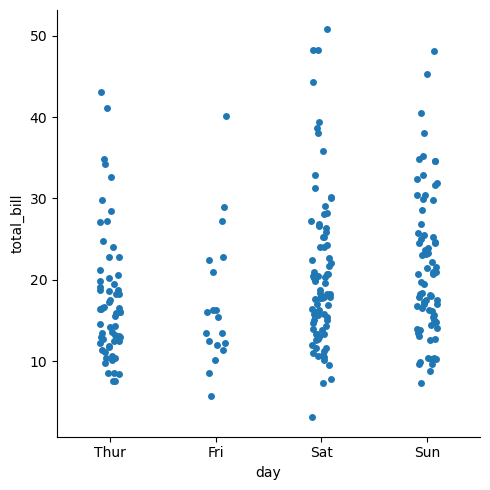

In [6]:
sns.catplot(
    data=tips,
    x='day', y='total_bill',
    kind='strip',
);

> A **strip plot** is a single-axis scatter plot that is used to visualise the distribution of many individual one-dimensional values. The values are plotted as dots along one unique axis, and the dots with the same value can overlap.

**jitter**

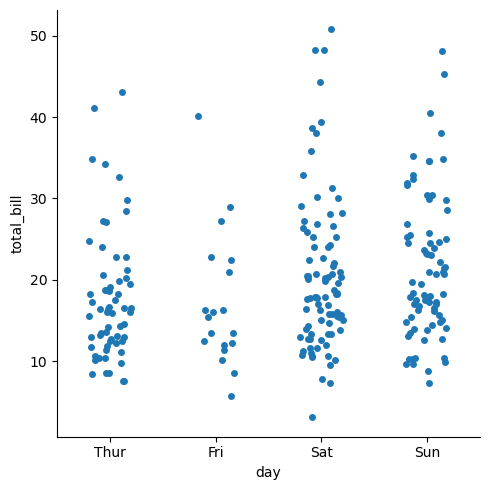

In [7]:
sns.catplot(
    data=tips,
    x='day', y='total_bill',
    kind='strip',
    jitter=0.2,
);

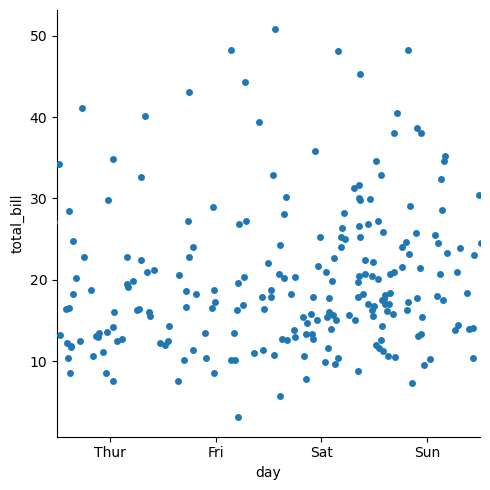

In [8]:
sns.catplot(
    data=tips,
    x='day', y='total_bill',
    kind='strip',
    jitter=1
);

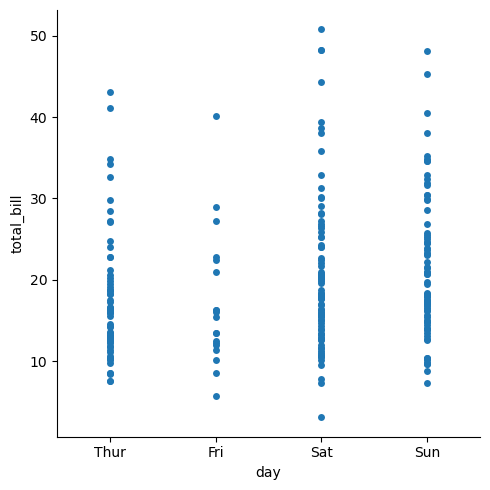

In [10]:
sns.catplot(
    data=tips,
    x='day', y='total_bill',
    kind='strip',
    jitter=False,
);

___

The second approach adjusts the points along the categorical axis using an algorithm that **prevents them from overlapping**. 
It can give a better representation of the distribution of observations, although **it only works well for relatively small datasets**. This kind of plot is sometimes called a **“beeswarm”** and is drawn in seaborn by `swarmplot()`, which is activated by setting `kind="swarm"` in catplot():

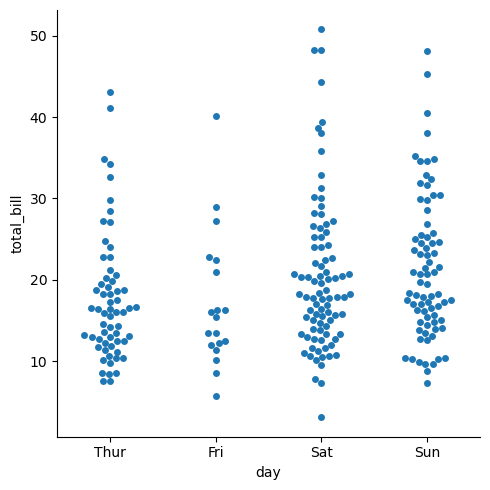

In [11]:
sns.catplot(
    data=tips,
    x='day', y='total_bill',
    kind='swarm',
);

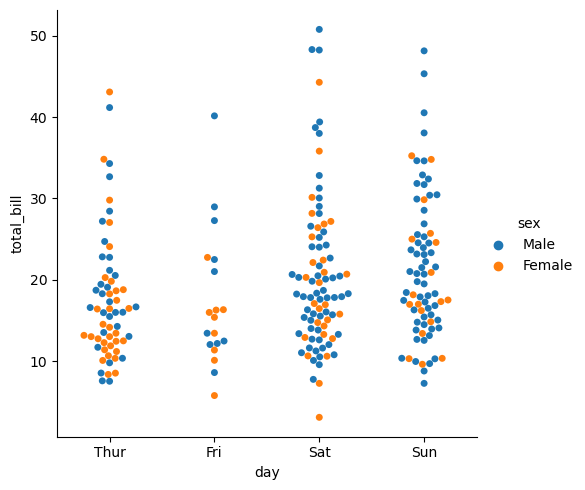

In [12]:
sns.catplot(
    data=tips,
    x='day', y='total_bill',
    kind='swarm',
    hue='sex',
);

Unlike with numerical data, it is not always obvious how to order the levels of the categorical variable along its axis. In general, the seaborn categorical plotting functions try to infer the order of categories from the data. If your data have a pandas Categorical datatype, then the default order of the categories can be set there. If the variable passed to the categorical axis looks numerical, the levels will be sorted. But the data are still treated as categorical and drawn at ordinal positions on the categorical axes (specifically, at 0, 1, …) even when numbers are used to label them:

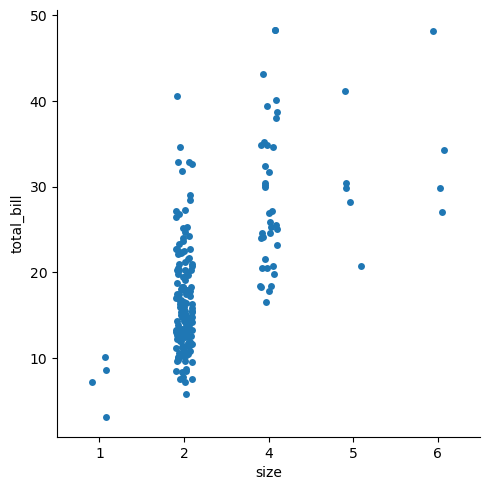

In [14]:
sns.catplot(
    data=tips.query("size != 3"),
    x='size', y='total_bill',
);                  

> Note how size=3 is missing, but numbers have even space on x axis.



The other option for choosing a default ordering is to take the levels of the category as they appear in the dataset. The ordering can also be controlled on a plot-specific basis using the **order** parameter. This can be important when drawing multiple categorical plots in the same figure, which we’ll see more of below:

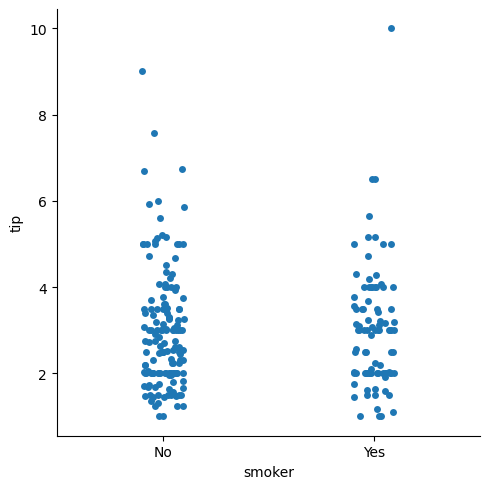

In [17]:
sns.catplot(
    data=tips,
    x='smoker', y='tip',
    order=['No', 'Yes'],
);

We’ve referred to the idea of “categorical axis”. In these examples, that’s always corresponded to the horizontal axis. But it’s often helpful to put the categorical variable on the vertical axis (particularly when the category names are relatively long or there are many categories). To do this, swap the assignment of variables to axes:

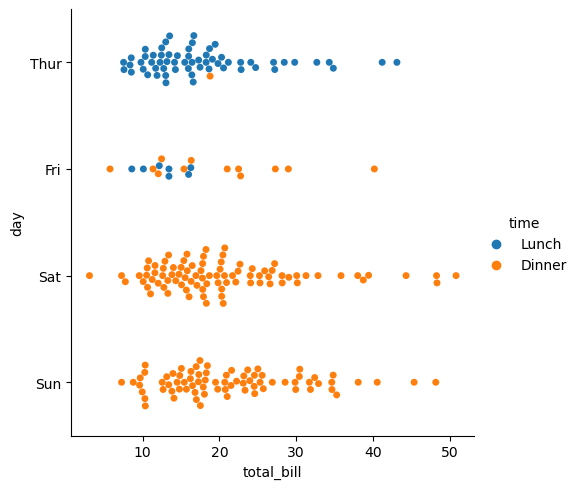

In [19]:
sns.catplot(
    data=tips,
    x='total_bill', y='day',
    hue='time',
    kind='swarm',
)

## Comparing Distributions

### Boxplot

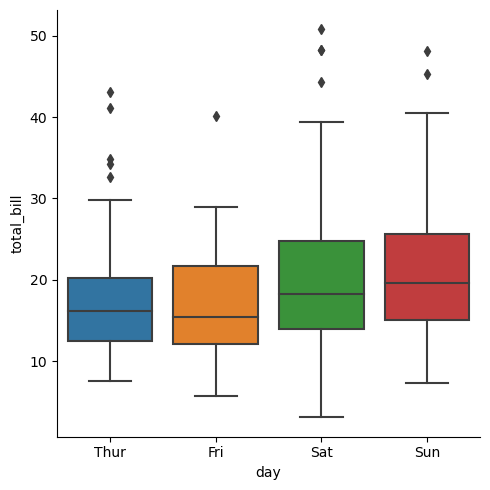

In [20]:
sns.catplot(
    data=tips,
    x='day', y='total_bill',
    kind='box',
)

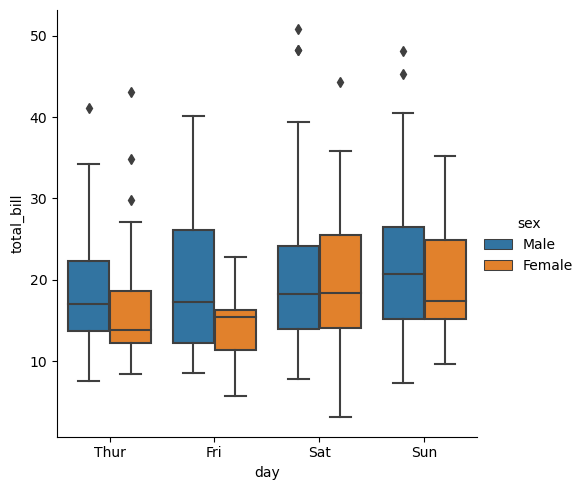

In [23]:
sns.catplot(
    data=tips,
    x='day', y='total_bill',
    kind='box',
    hue='sex',

)

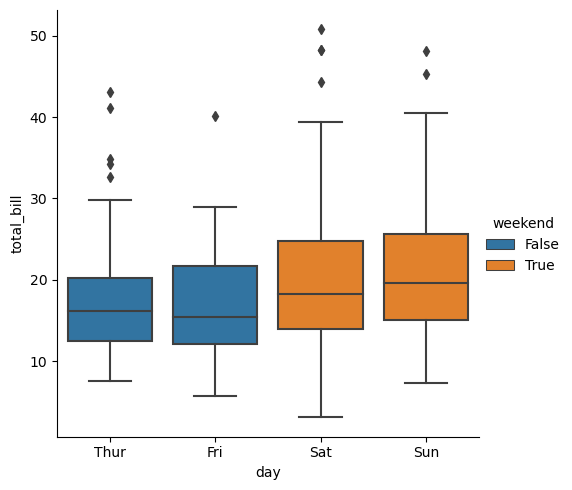

In [26]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(
    data=tips, x="day", y="total_bill",
    hue="weekend",
    kind="box",
    dodge=False,
)

A related function, `boxenplot()`, draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

In [28]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


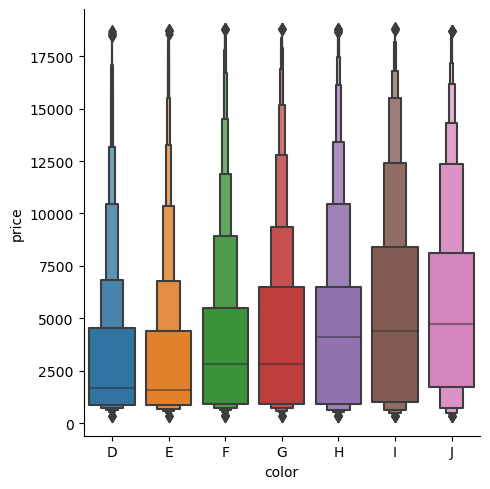

In [31]:
sns.catplot(
    data=diamonds,
    x='color', y='price',
    kind='boxen',
)

### Violinplots

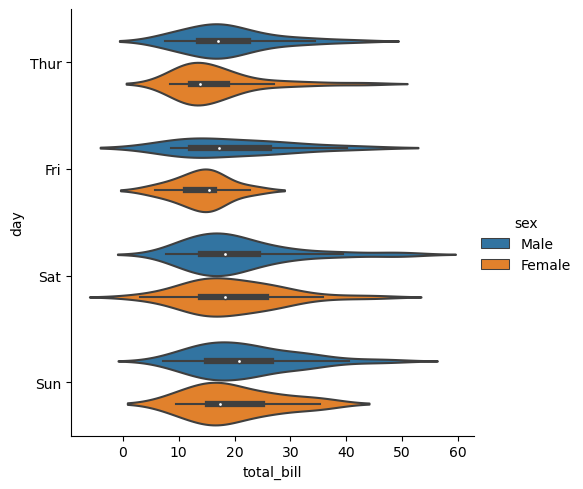

In [33]:
tips = sns.load_dataset('tips')

sns.catplot(
    data=tips,
    x='total_bill', y='day',
    kind='violin',
    hue='sex',
);

**This approach uses the kernel density estimate to provide a richer description of the distribution of values**. Additionally, the quartile and whisker values from the boxplot are shown inside the violin. The downside is that, because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:

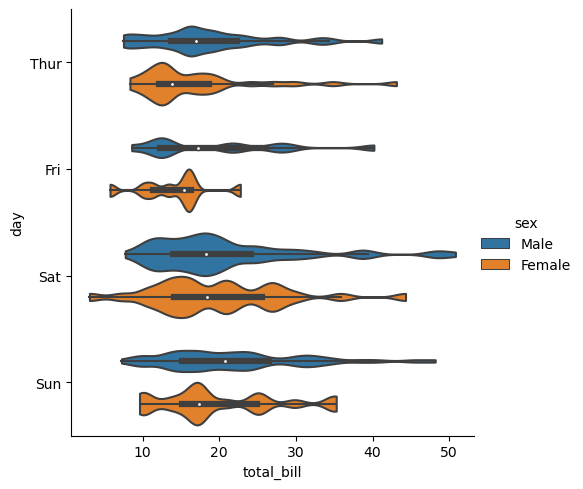

In [38]:
sns.catplot(
    data=tips,
    x='total_bill', y='day',
    kind='violin',
    hue='sex',
    bw=0.15,
    cut=0,
);

It’s also possible to `“split”` the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:



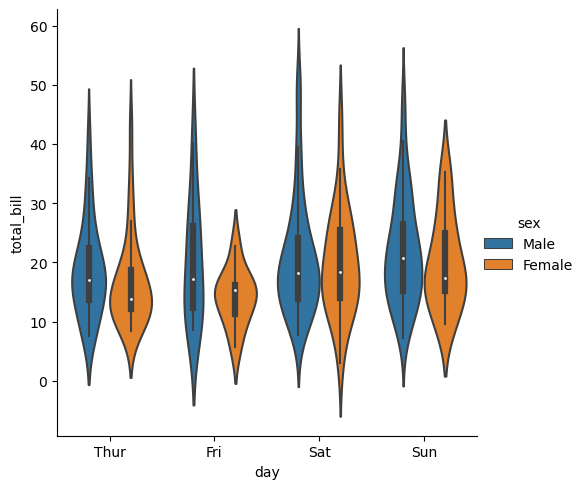

In [41]:
sns.catplot(
    data=tips,
    x="day", y="total_bill",
    hue="sex",
    kind="violin",
    split=False,
)

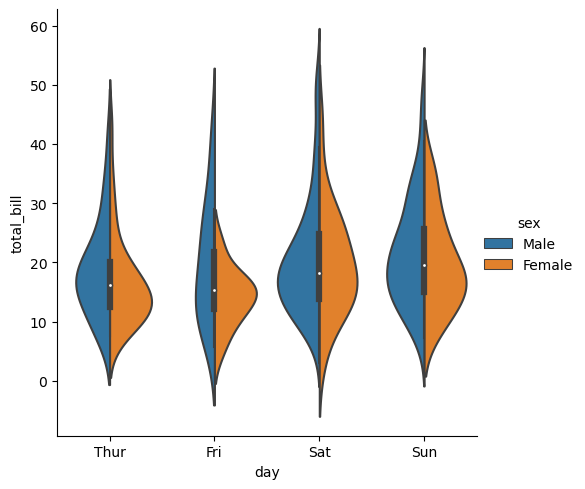

In [40]:
sns.catplot(
    data=tips,
    x="day", y="total_bill",
    hue="sex",
    kind="violin",
    split=True,
)

Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values:

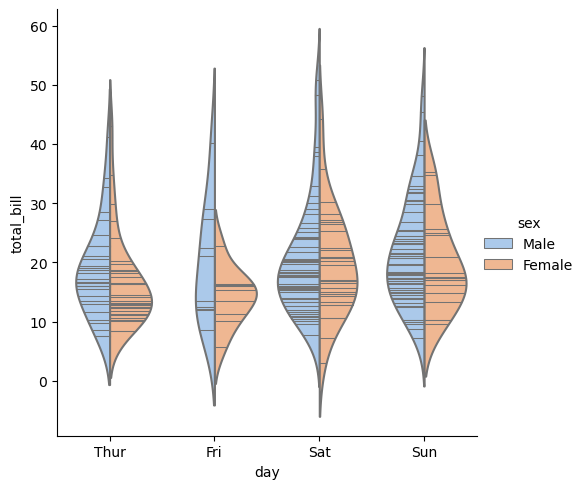

In [46]:
sns.catplot(
    data=tips,
    x='day', y='total_bill',
    hue='sex',
    kind='violin',
    inner='stick',
    split=True,
    palette='pastel'
);

It can also be useful to **combine** `swarmplot()` or `stripplot()` with a box plot or violin plot to show each observation along with a summary of the distribution:



/Users/artmissg/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


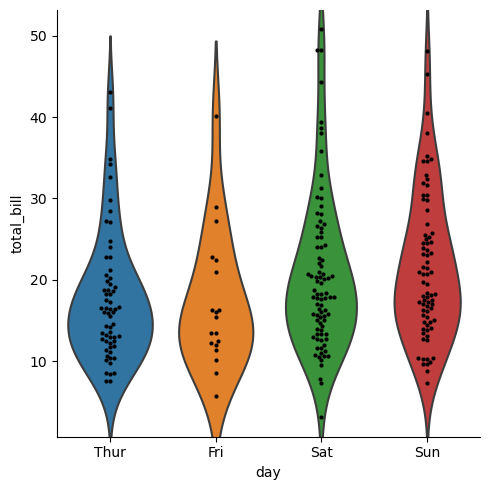

In [61]:
g = sns.catplot(
    data=tips,
    x='day', y='total_bill',
    kind='violin',
    inner=None,
)

g.map(
    sns.swarmplot,
    data=tips,
    x='day',
    y='total_bill',
    color='black',
    size=3
);

<AxesSubplot:xlabel='day', ylabel='total_bill'>

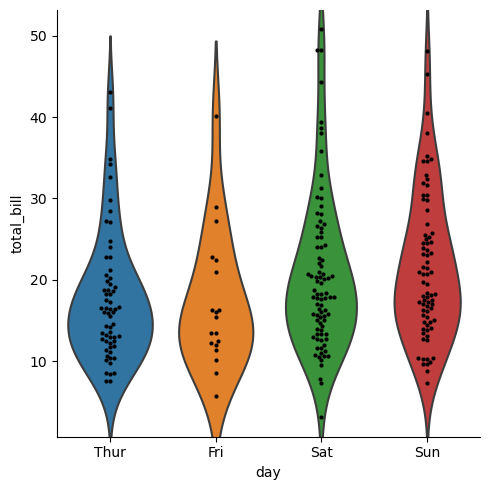

In [62]:
g = sns.catplot(
    data=tips,
    x="day", y="total_bill",
    kind="violin",
    inner=None
)

sns.swarmplot(
    data=tips,
    x="day", y="total_bill",
    color="k",
    size=3,
    ax=g.ax
)

### Estimating central tendency

For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values. Seaborn has two main ways to show this information. Importantly, the basic API for these functions is identical to that for the ones discussed above.

### Bar plots

In [64]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


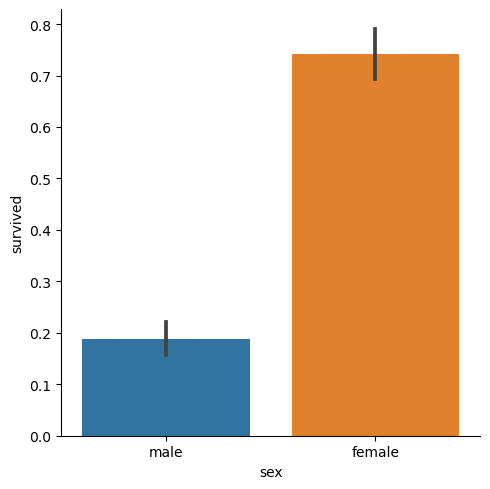

In [65]:
sns.catplot(
    data=titanic,
    x='sex', y='survived',
    kind='bar',
)

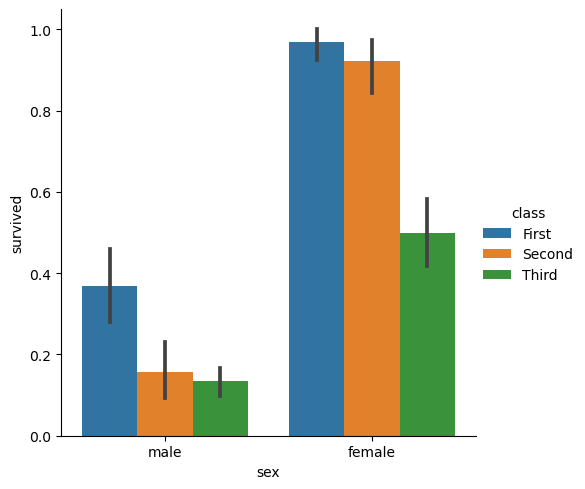

In [70]:
sns.catplot(
    data=titanic,
    x='sex', y='survived',
    kind='bar',
    hue='class',
)

The default error bars show 95% confidence intervals, but (starting in v0.12), it is possible to select from a number of other representations:



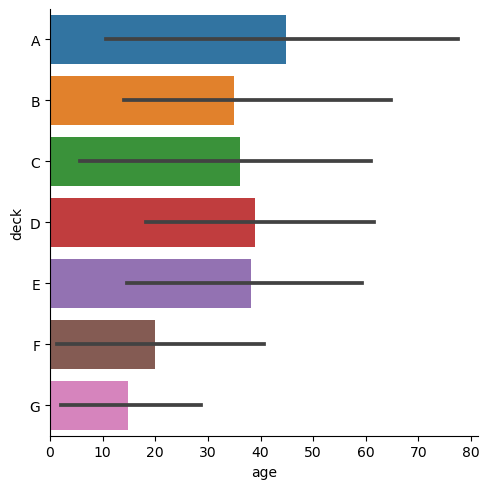

In [71]:
sns.catplot(
    data=titanic,
    x='age', y='deck',
    errorbar=('pi', 95),
    kind='bar',
)

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:

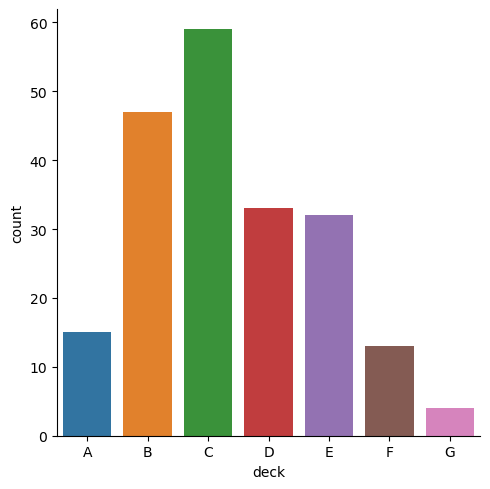

In [80]:
sns.catplot(
    data=titanic,
    x='deck',
    kind='count',
)

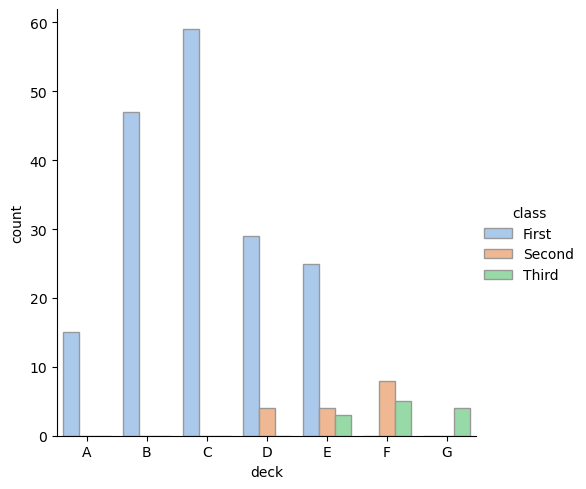

In [83]:
sns.catplot(
    data=titanic,
    x='deck',
    hue='class',
    kind='count',
    palette='pastel',
    edgecolor='0.6',
)

### Point plots

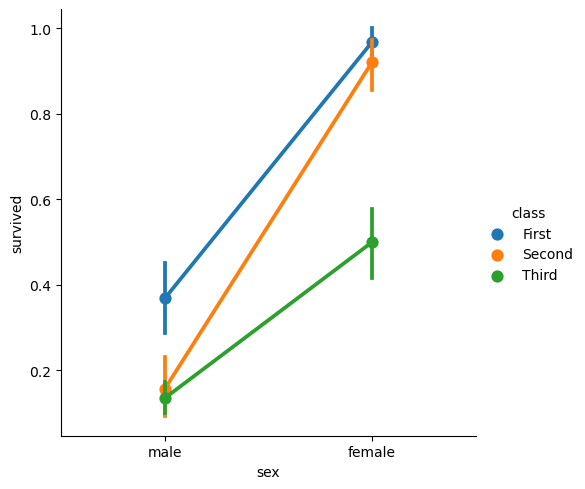

In [86]:
sns.catplot(
    data=titanic,
    x='sex', y='survived',
    kind='point',
    hue='class',
)

While the categorical functions lack the style semantic of the relational functions, it can still be a good idea to vary the marker and/or linestyle along with the hue to make figures that are maximally accessible and reproduce well in black and white:

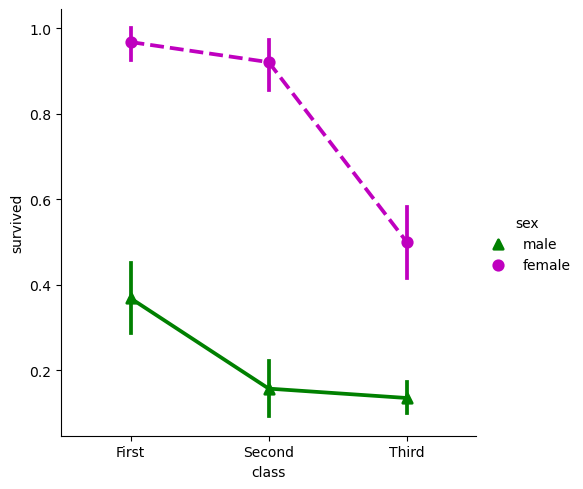

In [87]:
sns.catplot(
    data=titanic,
    x="class", y="survived",
    hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"],
    linestyles=["-", "--"],
    kind="point"
)


### Showing additional dementions

Just like relplot(), the fact that catplot() is built on a FacetGrid means that it is easy to add faceting variables to visualize higher-dimensional relationships:

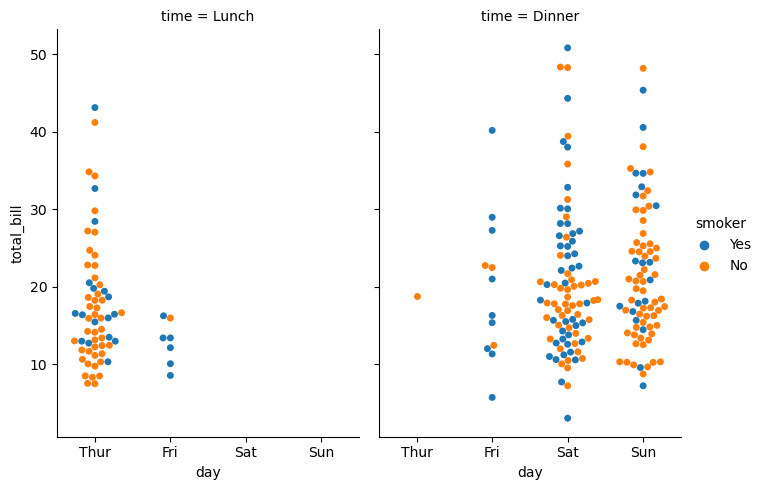

In [88]:
sns.catplot(
    data=tips,
    x="day", y="total_bill",
    hue="smoker",
    kind="swarm",
    col="time",
    aspect=.7,
)

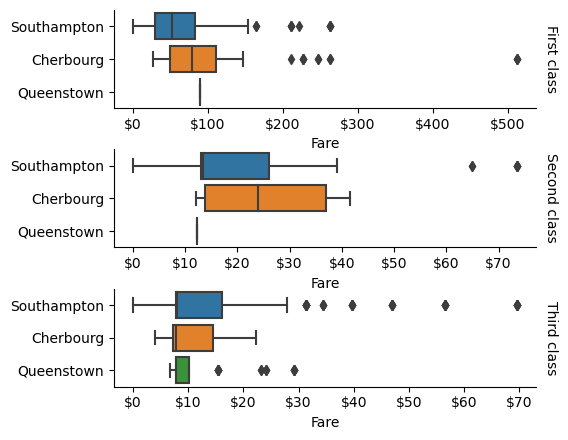

In [89]:
g = sns.catplot(
    data=titanic,
    x="fare", y="embark_town", row="class",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')